In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in ZHVI Home Data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ZHVI = Zillow Home Value Index**

In [ ]:
zhvi = pd.read_csv("Zip_Zhvi_Summary_AllHomes.csv")
zhvi.head(5)

**Drop Zips with low Population**

**Sort By Price**

In [ ]:
zhvi = zhvi[zhvi.SizeRank > 8000]
zhvi.sort_values(by='Zhvi').head(5)

## Drop Unused Columns

In [ ]:
zhvi.drop(['Date','RegionID','MoM'],1).head(5)

# Start Graphing

In [ ]:
zhvistate = zhvi.groupby('State')

zhvistate[('Zhvi','PeakZHVI')].mean().sort_values(by='Zhvi',ascending=False).plot.bar(figsize=(15,5))

In [ ]:
ax = zhvistate[('5Year','10Year')].mean().sort_values(by='10Year').plot.bar(figsize=(15,5),title='5 and 10 Year Percent Change in ZHVI')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.set_ylabel('Percent Change')

# Import Rent Data

In [3]:
rent = pd.read_csv('Zip_PriceToRentRatio_AllHomes (1).csv')
rent.head(4)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
0,61639,10025,New York,NY,New York,New York,1,18.74,18.92,19.07,...,26.56,26.58,25.85,25.25,23.29,23.22,23.42,23.74,23.53,22.91
1,84654,60657,Chicago,IL,Chicago,Cook,2,13.27,13.20,13.20,...,12.33,12.39,12.27,12.30,12.41,12.39,12.46,12.39,12.41,12.35
2,61637,10023,New York,NY,New York,New York,3,20.48,20.73,20.59,...,25.62,25.16,24.16,23.62,21.78,21.97,21.88,21.55,21.43,20.88
3,84616,60614,Chicago,IL,Chicago,Cook,4,14.09,14.04,13.85,...,13.35,13.48,13.35,13.36,13.19,13.20,13.32,13.31,13.40,13.36


In [4]:
pricetorent = rent[['RegionName','City','State','SizeRank','2016-05']]
pricetorent.head(5)

,RegionName,City,State,SizeRank,2016-05
0,10025,New York,NY,1,22.91
1,60657,Chicago,IL,2,12.35
2,10023,New York,NY,3,20.88
3,60614,Chicago,IL,4,13.36
4,79936,El Paso,TX,5,9.10


## Rename Columns

In [6]:
pricetorent = pricetorent.rename(columns={'2016-05':'PtoR','RegionName':'Zip'})
pricetorent.head(5)

,Zip,City,State,SizeRank,PtoR
0,10025,New York,NY,1,22.91
1,60657,Chicago,IL,2,12.35
2,10023,New York,NY,3,20.88
3,60614,Chicago,IL,4,13.36
4,79936,El Paso,TX,5,9.10


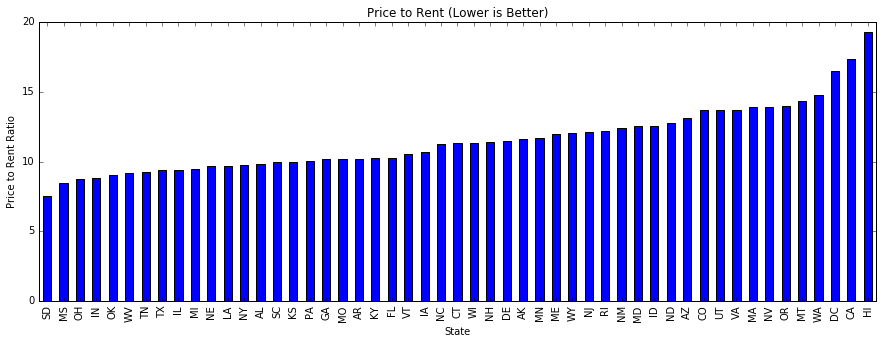

In [7]:
ptrstate = pricetorent.groupby('State')

ax = ptrstate['PtoR'].mean().sort_values().plot.bar(figsize=(15,5),title='Price to Rent (Lower is Better)')
ax.set_ylabel('Price to Rent Ratio')